In [101]:

import pandas as pd
import datetime as dt
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

## Who Use Divvy in Chicago and When??

We can download data for every trip taken on divvy bike from its website: https://www.divvybikes.com/system-data

For example if I check out the bike at millenium station, ride the bike to Chicago Public Library and return the bike to the dock in front of the library there, it counts as one trip. 

The data are organized by quarter for 2013 (when divvy was launched) to 2017. The size of data for this entire period is extremely huuuge. 10 Million observations and will take a long time to load even with json thus will make it inconvenient to analyze. Therefore, due to the scope of the project, we only selected data for 2017 and believe it is a good estimate for other years as well. 

Since divvy was introduced in 2013, the product/service is not super mature and we expect user behavior change a lot when adapting to a new service product. Even though 2017's data only has Q1 Q2 available right now, it indeed covers half a year and two seasons and should serve as a good candidate to understand bike usage variations. 

In [102]:
trips_2017_q1= pd.read_csv('/Users/shuhan_zhou/Documents/GitHub/divvy_new/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q1.csv')

In [103]:
trips_2017_q2= pd.read_csv('/Users/shuhan_zhou/Documents/GitHub/divvy_new/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q2.csv')

append two datasets together

In [104]:
trips_2017 = trips_2017_q1.append(trips_2017_q2)

In [105]:
trips_2017.set_index('trip_id', inplace=True)

The dataset includes year of birth reported by users when the register for divvy bike. But, we are rather interested in their age than year of birth so we generate a new column for user's age in 2017

In [106]:
trips_2017.loc[:,'current_year'] = 2017
trips_2017['user_age'] = trips_2017['current_year'] - trips_2017['birthyear']

In [107]:
trips_2017.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,current_year,user_age
trip_id,,,,,,,,,,,,,
13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,2017,28.0
13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,2017,27.0
13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,2017,38.0
13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,2017,32.0
13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,2017,28.0


One way to see how good a dataset is by examining its "missingness"

From a glance, we can see we have roughly 1.5 Million trips taken in the first half of 2017. the average trip duration is 939 seconds (about 15 mins) which makes sense according to the anecdotal evidence that divvy bikes are used to get you through "the last mile". 

Average user age is around 36

In [108]:
trips_2017.describe()

,bikeid,tripduration,from_station_id,to_station_id,birthyear,current_year,user_age
count,1.551505e+06,1.551505e+06,1.551505e+06,1.551505e+06,1.234822e+06,1551505.0,1.234822e+06
mean,3.159740e+03,9.397778e+02,1.793282e+02,1.794676e+02,1.980864e+03,2017.0,3.613636e+01
std,1.728395e+03,1.617702e+03,1.318927e+02,1.319918e+02,1.099154e+01,0.0,1.099154e+01
min,1.000000e+00,6.000000e+01,2.000000e+00,2.000000e+00,1.899000e+03,2017.0,1.000000e+00
25%,1.657000e+03,3.920000e+02,7.400000e+01,7.400000e+01,1.975000e+03,2017.0,2.800000e+01
50%,3.318000e+03,6.700000e+02,1.530000e+02,1.530000e+02,1.984000e+03,2017.0,3.300000e+01
75%,4.689000e+03,1.127000e+03,2.680000e+02,2.680000e+02,1.989000e+03,2017.0,4.200000e+01
max,5.920000e+03,8.633800e+04,6.230000e+02,6.230000e+02,2.016000e+03,2017.0,1.180000e+02


In [109]:
trips_2017.isnull().sum()

start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               316867
birthyear            316683
current_year              0
user_age             316683
dtype: int64

Forget about string variables for now, the reader might be asking why for gender birth year and user age the number of missings are (almost) the same? Well, user age is generated from birth year so it makes sense. 

gender and birth year....this is because divvy classify people who have used divvy into two categories:

one time users, being reffered to as "customers". such as tourists
subscribers who pay a monthly fee and use divvy probably very regularly. 

only subscribers report their gender and age when registering for divvy. makes sense now?

we can verify by seeing how many customers are in the dataset

In [110]:
trips_2017['usertype'].value_counts()

Subscriber    1234339
Customer       317162
Dependent           4
Name: usertype, dtype: int64

As expected, there are around 310,000 trips undertaken by customers. which explains why gender and age info for those trips are not stored. Roughly 20% of all trips. It is a relatively high ratio in terms of missing ness, but since the entire dataset is over 1.5 million, we are not super concerned about it




now we move on to analyzing the user characteristics of these trips

In [111]:
##analysis of user characteristics
trips_by_gender = trips_2017['gender'].value_counts()
trips_by_age = trips_2017['user_age'].value_counts()

In [112]:
trips_by_gender 

Male      935854
Female    298784
Name: gender, dtype: int64

apparently divvy attracts more male users than females 

In [113]:
trips_by_age.head()

28.0    76489
26.0    64447
29.0    64041
27.0    63643
30.0    62329
Name: user_age, dtype: int64

Not surprisingly, people in their late 20s use divvy bike a lot. probably because they need to get around places, commute, live in the city and dont have a car



Another interesting statistics reported are the trip duration. Divvy has limits on how long can users ride their bike on each trip. trip duration also influences charge and serve as a good reflection on far each trip is. after all bike speed must be within a certain range

First, we summarize the average trip duration by user gender

In [114]:
average_duration_gender = trips_2017.groupby('gender').tripduration.mean()  #tripduration are in seconds
print(average_duration_gender)

gender
Female    783.663285
Male      673.063025
Name: tripduration, dtype: float64


As noted earlier, there are fewer female users than male ones BUT 

once female decide to use divvy bikes, they turn to ride longer trips(on average almost 2 mins longer)!


It is important to note that trip duration does not imply distance between starting point and final destination as people can ride in circles, get lost travel back and forth etc...... 



Stereotypically females are less athletic and more risk averse so it could be that females simply ride their bikes more slowly. But it is also possible that females only use divvy bike when they are going to further places.

Without more information/data on individual usage, we are unable to really find the cause why female trips are longer.  

Next, average trip duration by user age

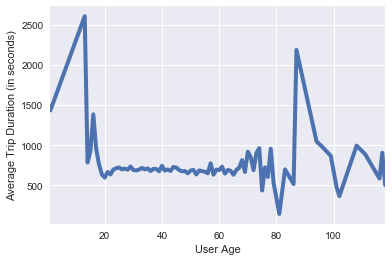

In [115]:
average_duration_age = trips_2017.groupby('user_age').tripduration.mean()  #tripduration are in seconds
ax = average_duration_age.plot(linewidth = 4)

ax.set_xlabel("User Age")
ax.set_ylabel("Average Trip Duration (in seconds)");
fig = ax.get_figure()
fig.savefig('Trip Duration by Age.png')

We do not expect people under the age of 10 or above 90 to use divvy bike for all sorts of reasons (their physical capacity, divvy bike's fit etc). But we can see there are users under the age of 10 and above 100, even 120 years old! we regard these incidences as errors from the entry or simply some people do not wish to disclose their age to divvy. 





Looking at valid observations for users between 20-80 year old. the average trip duration roughly stays the same level (around 600 seconds, i.e. 10 mins). 

for users aged over 60, it starts to show large variations which is sensible because physical condition for the elders also has large variations which in turn influences the amount of time they feel comfortable riding a bike. 

In [116]:
average_duration_usertype = trips_2017.groupby('usertype').tripduration.mean()  #tripduration are in seconds
print(average_duration_usertype)

usertype
Customer      1873.963095
Dependent      454.250000
Subscriber     699.741475
Name: tripduration, dtype: float64


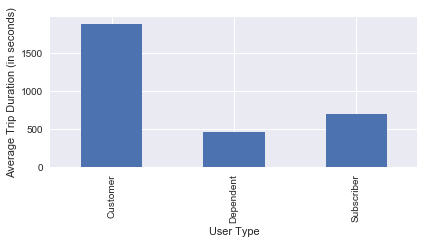

In [117]:
ax = average_duration_usertype.plot(kind = 'bar')
ax.autolayout: True

ax.set_xlabel("User Type")
ax.set_ylabel("Average Trip Duration (in seconds)")

fig = ax.get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('Trip Duration by User Type.png')

One time user (customers) ride divvy bikes much longer than subscriber users (20 mins longer!). 





Economic intuition can explain this phenomenon: once the "customer" paid their fees, it became a sunk cost, and they want to make the most out of this one time use. Whereas subscribers pay a monthly fee and use divvy bikes more regularly; they can benefit from the number of trips, not necessarily the duration of the trips.



Also, we expect subscribers who have full time work/study and more likely to use divvy bikes to travel between fixed points. A portion of "customers" could be tourists who have less time constraint to use divvy.   


Dependents have the shortest (in time) divvy bikes. it is possible they are kids so they dont like riding bikes, or they dont have very far place to be

### When Do Divvy Trips Happen?


After looking at the user side of story, we now turn the trips themselves. 

When do divvy trips happen? Is there a pattern in time, seasonality etc?


        -when do most trips happen?
        -how do trip duration vary according to time? 

Before we get to the details, need to clean the date time column a bit

In [118]:
trips_2017['start_time_formatted'] =  pd.to_datetime(trips_2017['start_time'], format='%m/%d/%Y %H:%M:%S')
trips_2017['end_time_formatted'] =  pd.to_datetime(trips_2017['end_time'], format='%m/%d/%Y %H:%M:%S')

In [119]:
trips_2017['start_time_time']= trips_2017['start_time_formatted'].dt.time
trips_2017['end_time_time']= trips_2017['end_time_formatted'].dt.time
trips_2017['start_date']= trips_2017['start_time_formatted'].dt.date
trips_2017['end_date']= trips_2017['end_time_formatted'].dt.date

In [120]:
#return day of the week as an integer where Monday is 0 and Sunday is 6
trips_2017['start_day_of_week']= trips_2017['start_time_formatted'].dt.weekday
trips_2017['end_day_of_week']= trips_2017['end_time_formatted'].dt.weekday

Within a day, what time is the most popular hour for divvy



As we found out earlier, most trips are around 10-15 minutes. So here, we simply assume end hour of the trip is roughly the start hour of the trip therefore do not redundtly repeat the same exercise for end time for trips.

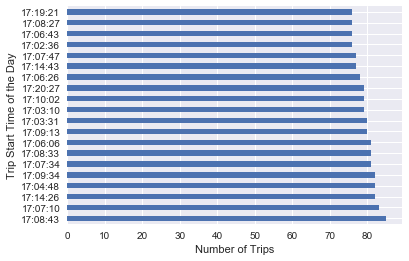

In [121]:

ax = trips_2017['start_time_time'].value_counts()[:20].plot(kind='barh')

ax.set_xlabel("Number of Trips")
ax.set_ylabel("Trip Start Time of the Day");
fig = ax.get_figure()
fig.savefig('Number of Trips by start time of day.png')

In terms of total number of trips of a given time stamp, the top 20 start times are all around 17:00 which is the off-work rush hour for most people. 

In the above plot, time is stored specific to the second. But we do not need such a precise time measure, what if we just wanna see which hour is the most popular hour for divvy?

In [122]:
trips_2017['start_time_hour']= trips_2017['start_time_formatted'].dt.hour

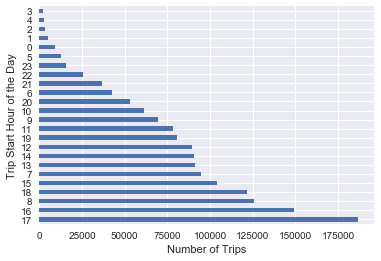

In [123]:
ax = trips_2017['start_time_hour'].value_counts().plot(kind='barh')

ax.set_xlabel("Number of Trips")
ax.set_ylabel("Trip Start Hour of the Day");
fig = ax.get_figure()
fig.savefig('Number of Trips by start hour of day.png')

Not surprisingly, as accurate as to the hour, a lot of trips start at 16 o'clock, 17 o'clock followed by 8 o'clock and 18 o'clock. These are clearly commute hours. Validating the assumption again that divvy bikes are mostly used for last mile of commute. 

/Applications/anaconda/envs/py-geo/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


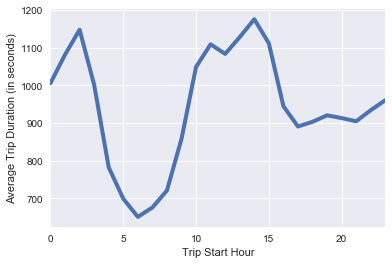

In [124]:
average_duration_hour = trips_2017.groupby('start_time_hour').tripduration.mean()  #tripduration are in seconds


ax = sns.tsplot(data=average_duration_hour, linewidth = 4)

ax.set_xlabel("Trip Start Hour")
ax.set_ylabel("Average Trip Duration (in seconds)");
fig = ax.get_figure()
fig.savefig('Trip Duration by Hour.png')

In terms of trip duration, people are making longer trips from 10 to 3pm and after midnight. 
Trip duration is increasing for the time period from 6am to 10 am and from 9 pm to 3 am. 

Potentially whats going on? 


Our guesses:


1) people are tired after work and turn to ride their bikes slower compared to during the day when they are more energetic. 

2) people are travelling to further places in the evening. Since the big increase in trip duration happens after 10pm, we can guess that people may ride their bikes after going out ot working late. 

In [125]:
trips_2017.loc[trips_2017['start_day_of_week'] == 0,'day_label'] = 'Monday'
trips_2017.loc[trips_2017['start_day_of_week'] == 1,'day_label'] = 'Tuesday'
trips_2017.loc[trips_2017['start_day_of_week'] == 2,'day_label'] = 'Wednesday'
trips_2017.loc[trips_2017['start_day_of_week'] == 3,'day_label'] = 'Thursday'
trips_2017.loc[trips_2017['start_day_of_week'] == 4,'day_label'] = 'Friday'
trips_2017.loc[trips_2017['start_day_of_week'] == 5,'day_label'] = 'Saturday'
trips_2017.loc[trips_2017['start_day_of_week'] == 6,'day_label'] = 'Sunday'

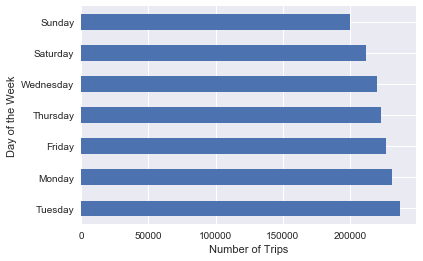

In [126]:
ax = trips_2017['day_label'].value_counts().plot(kind='barh')

ax.set_xlabel("Number of Trips")
ax.set_ylabel("Day of the Week");
fig = ax.get_figure()
fig.savefig('Number of Trips by Day of the Week.png')

There is no big variations in the number of trips by which day of the week. If any, Monday and Tuesday are the more popular days; Sunday and Saturday, relatively fewer people use divvy bikes. 

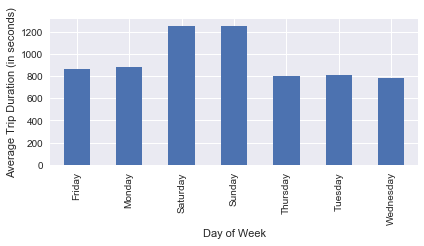

In [128]:
average_duration_day = trips_2017.groupby('day_label').tripduration.mean()


ax = average_duration_day.plot(kind = 'bar')
ax.autolayout: True

ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Trip Duration (in seconds)")

fig = ax.get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('Trip Duration by Day.png')

Interestingly, even though people use divvy bikes less often on the weekends but they do make longer trips. 
It is likely on the weekend that they have the luxury of spending more, riding their bike slowly as leisure activity instead of a means of transportation

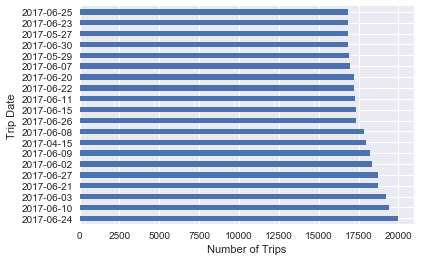

In [131]:
ax = trips_2017['start_date'].value_counts()[:20].plot(kind='barh')

ax.set_xlabel("Number of Trips")
ax.set_ylabel("Trip Date");
fig = ax.get_figure()
fig.savefig('Number of Trips by Date.png')

This bar chart shows on June 24 2017, divvy bike usage reached its peak within year 2017. And the top 20 daily usage are all in May and June (except one in April). We are curious whether it is because people like to spend more time biking in the summer. Therefore we produce the time series plot below. 

Generally, the usage of divvy bikes has been increasing in 2017 despite the variations within each month. We can attribute this increase to either 1) divvy has become more popular or expanding its services 2) as weather gets warmer, people are more willing to use divvy bikes. We now test the second hypothesis by examining the duration change over time. 

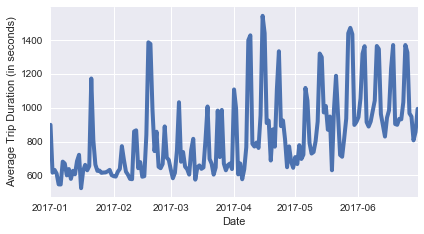

In [133]:
average_duration_date = trips_2017.groupby('start_date').tripduration.mean()


ax = average_duration_date.plot(linewidth = 4)
ax.autolayout: True

ax.set_xlabel("Date")
ax.set_ylabel("Average Trip Duration (in seconds)")

fig = ax.get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('Trip Duration by Date.png')

From the plot above, we can see average trip duration increased from January to July, verifying the assumption that people are willing to spend more time on their divvy bikes as the weather gets warmer. 

There is a big jump in trip duration in January and in February and more jumps in April and June, which can also verify that temperature is a factor taken into account when people make decision whether to use divvy bike or not. 

Now we aggregate average trip duration at the month levle to make the visualization clearer:

In [135]:
trips_2017['start_time_month']= trips_2017['start_time_formatted'].dt.month

average_duration_month = trips_2017.groupby('start_time_month').tripduration.mean()

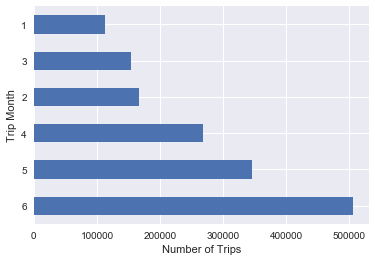

In [136]:
ax = trips_2017['start_time_month'].value_counts().plot(kind='barh')

ax.set_xlabel("Number of Trips")
ax.set_ylabel("Trip Month");
fig = ax.get_figure()
fig.savefig('Number of Trips by Month.png')

Very clear, big jump from April to May and from May to June. Feburary and March have very similar number of trips and in Chicago, the temperature for these two months do not vary much

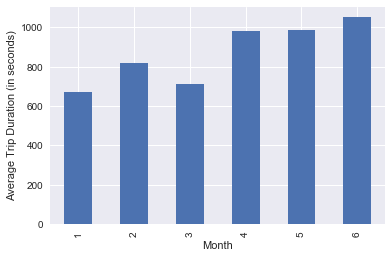

In [140]:
average_duration_month = trips_2017.groupby('start_time_month').tripduration.mean()



ax = average_duration_month.plot(kind = 'bar')
ax.autolayout: True
    
ax.set_xlabel("Month")
ax.set_ylabel("Average Trip Duration (in seconds)");
fig = ax.get_figure()
fig.savefig('Trip Duration by Hour.png')

Average duration of trips remain at similar levels for April, May and June where as January February and March remain at a stable but lower level. This variation can also be attribued to temperature: when its warmer, people love to spend more time outside. 